In [41]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Hanning Su/Desktop/5yr_patent_citation_dataset/patent_abs_tit_cit_ranked.csv',index_col='date')

In [5]:
df.head(10)

,patent_id,abstract,title,five_year_fcite,subsection_id,top1pct_label,top10pct_label,btm90_lst1_label,zero_cite_label
date,,,,,,,,,
1976-01-06,3930271,A golf glove is disclosed having an extra fing...,Golf glove,0,A63,0,0,0,1
1976-01-06,3930272,A lock for a height-adjustable crib or playpen...,Crib leg lock,0,A47,0,0,0,1
1976-01-06,3930273,A bed safety side rail arrangement which inclu...,Bed safety side rail arrangement,4,A61,0,0,1,0
1976-01-06,3930274,The assembly includes a longitudinal axis and ...,Assembly for use in recreational activities,0,B63,0,0,0,1
1976-01-06,3930275,A novel slipper and its method of fabrication ...,Method of fabricating a slipper,0,A43,0,0,0,1
1976-01-06,3930276,An automobile conveyor for use in conjunction ...,Wheel spinning and vehicle conveying apparatus...,0,B60,0,0,0,1
1976-01-06,3930277,A Mobile Floor Sweeper including a rotatable c...,Mobile floor sweeper,0,E01,0,0,0,1
1976-01-06,3930278,A device for removable attachment to a paintbr...,Paintbrush and guard attachment for edging,0,B44,0,0,0,1
1976-01-06,3930279,A rubber windshield wiper blade is clamped to ...,Rubber windshield wiper blades having increase...,1,B60,0,0,1,0


In [15]:
print(len(df)) # The dataset has 5159188 observations

5159188


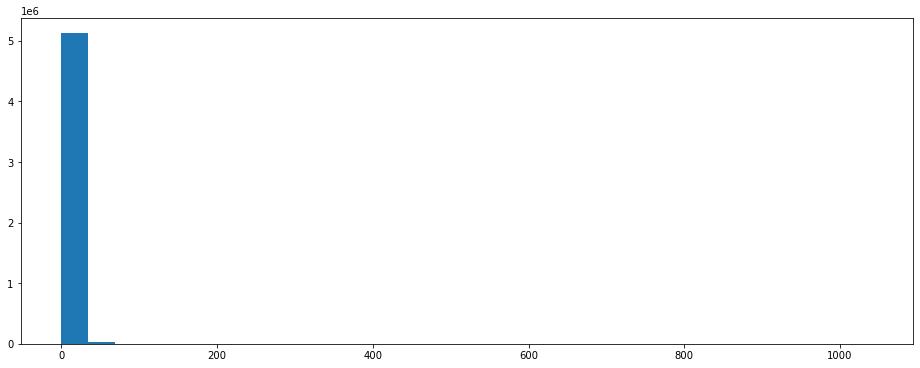

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.hist(df["five_year_fcite"], bins = 30)
plt.show()

As expected, patent citation has highly skewed distribution, with majority of observations with close to zero citations during five year interval after grant date. In ordre to better visualize the data, we take log(x + 1) transformation and plot again.

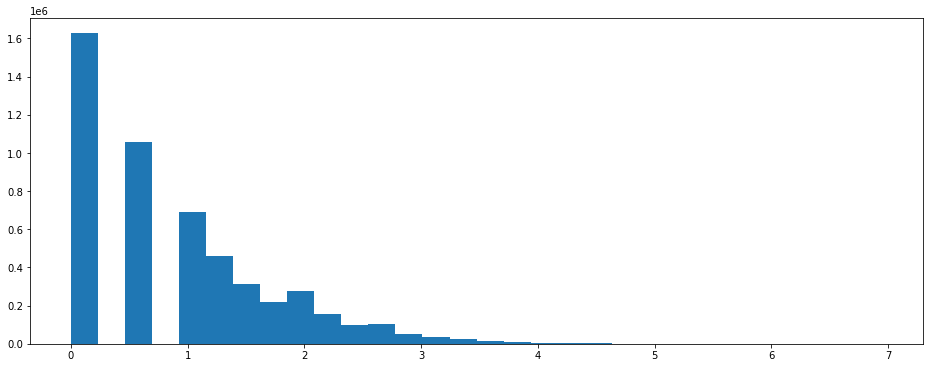

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.hist(np.log(df["five_year_fcite"] + 1), bins = 30)
plt.show()

Next we check the citation level indictors calculated based on the percentile of the distribution of five_year_fcite varaible.

In [57]:
print(np.sum(df['top1pct_label']))

print(np.sum(df['top1pct_label']) / len(df))

54274
0.010519872507068942


We have 54274 patents with citation count higher than about 99% of other patent in the their respective technology class.

In [58]:
print(np.sum(df['top10pct_label']))

print(np.sum(df['top10pct_label']) / len(df))

533654
0.10343759521847236


We have 533654 patents with citation count higher than about 90% of other patent in the their respective technology class.

In [59]:
print(np.sum(df['btm90_lst1_label']))

print(np.sum(df['btm90_lst1_label']) / len(df))

2943457
0.5705271837351149


In [60]:
print(np.sum(df['zero_cite_label']))

print(np.sum(df['zero_cite_label']) / len(df))

1627803
0.31551534853934377


We have 2943457 + 1627803 patents with citation count in the bottom 90% group. Those that have not yet receive any citations have their own label "zero_cite_label".